In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,layers,Model
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img
from os import listdir, walk
from os.path import isfile, join
import matplotlib.pyplot as plt

In [ ]:
from keras.preprocessing import image
import cv2
from keras import backend as K
from tensorflow.keras.models import load_model, save_model
import pandas as pd

Using TensorFlow backend.


In [ ]:
#CREATING DATAFRAME
train_dataframe = pd.read_csv('train_own_single.csv')
train_dataframe["images"]=train_dataframe["images"].apply(lambda x:x.split("_"))
test_dataframe = pd.read_csv('test_own_single.csv')
test_dataframe["images"]=train_dataframe["images"].apply(lambda x:x.split("_"))

In [ ]:
from tqdm import tqdm

In [ ]:
train_dataframe.head()

,Filepath,images
0,train/blue_0/blue_0.JPG,"[blue, 0]"
1,train/blue_0/_0_1048.jpg,"[blue, 0]"
2,train/blue_0/_0_1158.jpg,"[blue, 0]"
3,train/blue_0/_0_1290.jpg,"[blue, 0]"
4,train/blue_0/_0_1395.jpg,"[blue, 0]"


In [ ]:
datagen = ImageDataGenerator(
    
        rotation_range=180,

        width_shift_range=0.01,

        height_shift_range=0.01,

        rescale=1./255,

        shear_range=0.01,

        #zoom_range=0.01,

        # horizontal_flip=True,
        
        fill_mode='constant',

        cval=220
       )

In [ ]:
test_gen =  ImageDataGenerator( rescale=1./255)

In [ ]:
train_generator=datagen.flow_from_dataframe(
dataframe=train_dataframe[:],
directory="",
x_col="Filepath",
y_col="images",
batch_size=16,
seed=42,
shuffle=True,
class_mode="categorical",
# classes=['red','blue','green','yellow','0','1','2','3','4','5','6','7','8','9','plustwo','plusfour','wild'],
target_size=(150,150))
validation_generator=datagen.flow_from_dataframe(
dataframe=test_dataframe[:],
directory="",
x_col="Filepath",
y_col="images",
batch_size=16,
seed=42,
shuffle=True,
class_mode="categorical",
# classes=['red','blue','green','yellow','0','1','2','3','4','5','6','7','8','9','plustwo','plusfour','wild'],
target_size=(150,150))
validation_images = test_gen.flow_from_directory("testing_2/",
                                            class_mode="categorical",
                                            batch_size=1,
                                            target_size=(150,150))

Found 1671 validated image filenames belonging to 19 classes.


NameError: name 'test_gen' is not defined

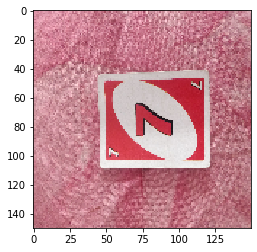

[[5.9221778e-03 1.0370618e-02 2.6169080e-01 8.4024571e-02 1.8859502e-03
  3.4004124e-03 7.2487079e-02 2.4936805e-02 1.8365459e-03 1.4489961e-02
  6.4276618e-01 3.3123888e-05 6.2367570e-04 2.0601630e-02 9.1600102e-01
  4.2989439e-01 2.9122613e-02 1.2202017e-05 2.4759760e-05]]
[('2', 0.2616908), ('blue', 0.6427662), ('red', 0.916001), ('reverse', 0.4298944)]


In [ ]:
#TESTING WITH GENERATOR IMAGES
x,y = validation_images.next()
for i in range(0,1):
    image = x[0]
    pred = model.predict(np.expand_dims(image, axis=0))
    plt.imshow(image.transpose(0,1,2))
    plt.show()
    print(pred) #SHOW ALL PREDICTIONS
    #print([rev_index[i] for i in range(19) if y[0][i]==1])
    print([(rev_index[i],pred[0][i]) for i in range(19) if pred[0][i]>0.15]) #PREDICTED LABEL WITH THRESHOLD AS 0.15

In [ ]:
#TESTING WITH CUSTOM IMAGES
img = cv2.imread('testing_batch1/class1/cam_0.jpg')
#Preprocessing images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
norm_img = np.zeros((800,800))
res = cv2.resize(img, dsize=(150,150))
res = cv2.normalize(res, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

res = res.transpose(0,1,2)
for i in range(0,1):
    image  = res
    pred = (model.predict(np.expand_dims(res, axis=0)))
    plt.imshow(res)
    #print(pred)
    plt.show()     
#print([rev_index[i] for i in range(19) if y[0][i]==1])
print([(rev_index[i],pred[0][i]) for i in range(19) if pred[0][i]>0.1])

In [ ]:
#CUSTOM MODEL WITH 5 CONV LAYERS AND FULLY CONNECTED LAYER

model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(19, activation='sigmoid')
])
#LASTLAYER SIGMOID IS USED INSTEAD OF SOFT MAX , SINCE THIS IS A MULTI-LABEL CLASSIFICATION 
#AND THE PROBABILITY OF EACH CLASS IS REQUIRED. ALSO "BINARY_CROSSENTROPY" IS USED FOR LOSS.

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108 (Conv2D)          (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 15, 15, 32)      

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_TRAIN=validation_generator.n//train_generator.batch_size

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='acc', patience=10)
# checkpoint_filepath = '/train'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='acc',
#     mode='max',
#     save_best_only=True)
#Custom Callback Function
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.98):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callback_acc = myCallback()
history = model.fit(train_generator,
                              validation_data = validation_generator, 
                              steps_per_epoch = STEP_SIZE_TRAIN,
                              epochs=2,
                              validation_steps= STEP_SIZE_TEST,
                              verbose=1,
                              callbacks = [callback_acc]
          )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 104 steps, validate for 104 steps
Epoch 1/25
103/104 [============================>.] - ETA: 0s - loss: 0.1250 - acc: 0.9541
Reached 95% accuracy so cancelling training!
104/104 [==============================] - 80s 766ms/step - loss: 0.1248 - acc: 0.9541 - val_loss: 0.0987 - val_acc: 0.9612


[]

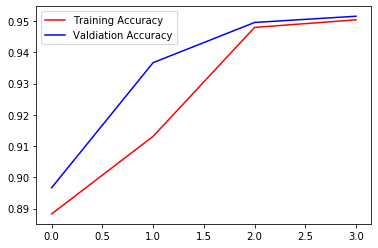

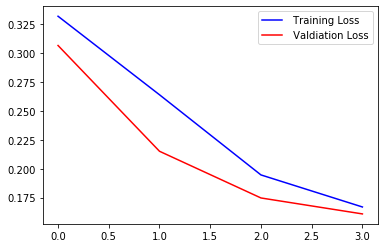

In [ ]:
#PLOTTING ACCUACY AND LOSS GRAPHS

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Valdiation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'b', label = ' Training Loss' )
plt.plot(epochs, val_loss, 'r', label = ' Valdiation Loss' )
plt.legend(loc=0)
plt.plot()

In [ ]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'blue': 10,
 'green': 11,
 'plusfour': 12,
 'plustwo': 13,
 'red': 14,
 'reverse': 15,
 'skip': 16,
 'wild': 17,
 'yellow': 18}

In [ ]:
#CREATING A REVERSE INDEX
rev_index = {}
for items in train_generator.class_indices.items() :
  rev_index[items[1]] = items[0]
print(rev_index)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'blue', 11: 'green', 12: 'plusfour', 13: 'plustwo', 14: 'red', 15: 'reverse', 16: 'skip', 17: 'wild', 18: 'yellow'}


In [ ]:
path = 'testing_batch1/class1/red_3_cam.jpg'
img = load_img(path,target_size=(150,150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images) 
print(classes)



[[0.0000000e+00 9.9988496e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.5182257e-21 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [ ]:
#FINDING LAYERS TO VISUZALIZE OUTPUTS
outputs = [layer.output for layer in model.layers]

# Define a new model that generates the above output
vis_model = Model(model.input, outputs)

# check if we have all the layers we require for visualization 
vis_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108_input (InputLayer [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 17, 17, 64)        0   

In [ ]:
def get_CAM(processed_image, predicted_label):
    """
    This function is used to generate a heatmap for a sample image prediction.
    
    Args:
        processed_image: any sample image that has been pre-processed using the 
                       `preprocess_input()`method of a keras model
        predicted_label: label that has been predicted by the network for this image
    
    Returns:
        heatmap: heatmap generated over the last convolution layer output 
    """
    # we want the activations for the predicted label
    predicted_output = model.output[:, predicted_label]
    
    # choose the last conv layer in your model
    last_conv_layer = model.get_layer('conv2d_112')
    
    # get the gradients wrt to the last conv layer
    grads = K.gradients(predicted_output, last_conv_layer.output)[0]
    
    # take mean gradient per feature map
    grads = K.mean(grads, axis=(0,1,2))
    
    # Define a function that generates the values for the output and gradients
    evaluation_function = K.function([model.input], [grads, last_conv_layer.output[0]])
    
    # get the values
    grads_values, conv_ouput_values = evaluation_function([processed_image])
    
    # iterate over each feature map in yout conv output and multiply
    # the gradient values with the conv output values. This gives an 
    # indication of "how important a feature is"
    for i in range(8): # we have 512 features in our last conv layer
        conv_ouput_values[:,:,i] *= grads_values[i]
    
    # create a heatmap
    heatmap = np.mean(conv_ouput_values, axis=-1)
    
    # remove negative values
    heatmap = np.maximum(heatmap, 0)
    
    # normalize
    heatmap /= heatmap.max()
    
    return heatmap

(150, 150)


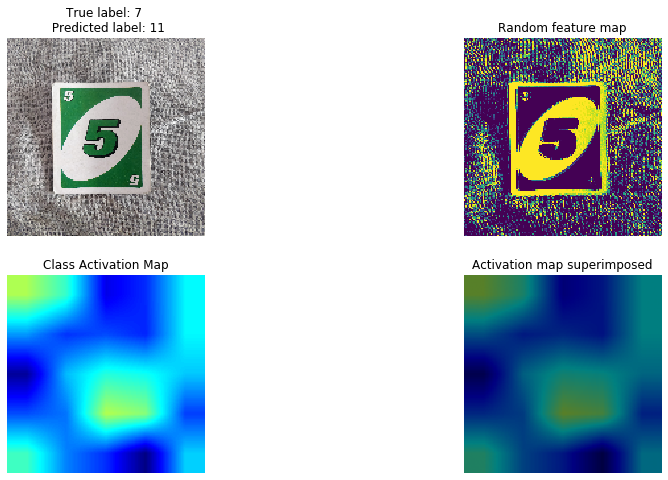

[[7.0466720e-03 1.8139991e-03 4.1064210e-02 3.9345619e-01 7.6531497e-04
  6.9717400e-02 1.1172615e-04 3.7375200e-03 3.3900777e-03 3.7450949e-03
  1.9583192e-02 9.9856901e-01 2.2185461e-03 1.8225762e-04 3.5111460e-09
  1.0330590e-02 1.3664261e-03 2.4357826e-08 1.1355830e-05]]


In [ ]:
path1 = 'testing_2/test_Final_Uno/IMG_20200523_130513.jpg'
sample_image = cv2.imread(path1)#(valid_df.iloc[idx]['image'])
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
# norm_img = np.zeros((800,800))
res = cv2.resize(sample_image, dsize=(150,150))
sample_image = cv2.normalize(res, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#sample_label = valid_df.iloc[idx]["label"]

# pre-process the image
sample_image_processed = np.expand_dims(sample_image, axis=0)
#sample_image_processed = preprocess_input(sample_image_processed)

# generate activation maps from the intermediate layers using the visualization model
activations = vis_model.predict(sample_image_processed)

# get the label predicted by our original model
pred_label = np.argmax(model.predict(sample_image_processed), axis=-1)[0]

# choose any random activation map from the activation maps 
sample_activation = activations[0][0,:,:,8]

# normalize the sample activation map
sample_activation-=sample_activation.mean()
sample_activation/=sample_activation.std()

# convert pixel values between 0-255
sample_activation *=255
sample_activation = np.clip(sample_activation, 0, 255).astype(np.uint8)



# get the heatmap for class activation map(CAM)
heatmap = get_CAM(sample_image_processed, pred_label)
heatmap = cv2.resize(heatmap, (sample_image.shape[0], sample_image.shape[1]))
print((sample_image.shape[0], sample_image.shape[1]))
heatmap = heatmap *255
heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
f,ax = plt.subplots(2,2, figsize=(15,8))
ax[1,0].imshow(heatmap)
ax[1,0].set_title("Class Activation Map")
ax[1,0].axis('off')
super_imposed_image = heatmap * 0.5 + sample_image
super_imposed_image = np.clip(super_imposed_image, 0,255).astype(np.uint8)
ax[0,0].imshow(sample_image)
ax[0,0].set_title(f"True label: 7 \n Predicted label: {pred_label}")
ax[0,0].axis('off')

ax[0,1].imshow(sample_activation)
ax[0,1].set_title("Random feature map")
ax[0,1].axis('off')


ax[1,1].imshow(super_imposed_image)
ax[1,1].set_title("Activation map superimposed")
ax[1,1].axis('off')
plt.show()
print(model.predict(sample_image_processed))

In [ ]:
save_model(model, 'custom_uno_final.h5')


</b>CONVERTING MODEL TO TFLITE FOR MOBILE DEPLOYMENT<b>


In [ ]:
print('\u2022 GPU Device Found.' if tf.test.is_gpu_available() else '\u2022 GPU Device Not Found. Running on CPU')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
• GPU Device Found.


In [ ]:
tf.saved_model.save(model, "tf_uno")


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: tf_uno\assets


In [ ]:
loaded = tf.saved_model.load("tf_uno")



In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'conv2d_108_input': TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='conv2d_108_input')})
{'dense_53': TensorSpec(shape=(None, 19), dtype=tf.float32, name='dense_53')}


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("tf_uno")
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
converter.target_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
#THE MODEL PREFERENCE IS SET TO UINT8 SINCE ANDROID DOES NOT SUPPORT TENSORS OF FLOAT32
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
# Load TFLite model and allocate tensors.
# with open(tflite_model_file, 'rb') as fid:
#     tflite_model = fid.read()
    
interpreter = tf.lite.Interpreter(model_path="D:\\Testing_UNO\\converted_model.tflite")
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
print(input_index, output_index)

29 0


In [ ]:
img = cv2.imread('testing_batch1/class1/yellow_7_cam_crop.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
norm_img = np.zeros((800,800))
res = cv2.resize(img, dsize=(150,150))
res = cv2.normalize(res, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#print(res)
res = res.transpose(0,1,2)
res = np.expand_dims(res, axis=0)
interpreter.set_tensor(input_index, res)
interpreter.invoke()
print([(rev_index[i],interpreter.get_tensor(output_index)[0][i]) for i in range(19) if interpreter.get_tensor(output_index)[0][i]>0.15 ])
# print([(rev_index[i],pred[0][i]) for i in range(19) if pred[0][i]>0.15])
# test_labels.append(label.numpy()[0])
# test_imgs.append(img)

[('7', 0.3200741), ('yellow', 0.9723555)]
